## Classifying Consumer Complaints

Name: Shiven Shashidhar; Andrew ID: sshashid

In [885]:
'''
# Pulling data from API
import pandas as pd
from sodapy import Socrata

client = Socrata("data.consumerfinance.gov",
                 "weEfAxPKegK9IvduaQRFsD3EY",
                 username="shivens@cmu.edu",
                 password="DSPM_hw_2019")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("s6ew-h6mp", limit=2000)

# Convert to pandas DataFrame
df = pd.DataFrame.from_records(results)
'''

'\n# Pulling data from API\nimport pandas as pd\nfrom sodapy import Socrata\n\nclient = Socrata("data.consumerfinance.gov",\n                 "weEfAxPKegK9IvduaQRFsD3EY",\n                 username="shivens@cmu.edu",\n                 password="DSPM_hw_2019")\n\n# First 2000 results, returned as JSON from API / converted to Python list of\n# dictionaries by sodapy.\nresults = client.get("s6ew-h6mp", limit=2000)\n\n# Convert to pandas DataFrame\ndf = pd.DataFrame.from_records(results)\n'

In [886]:
#loading data from CSV file
import pandas as pd
df = pd.read_csv('./Consumer_Complaints.csv', encoding='utf-8')

C:\Users\Shiven\Anaconda3\envs\py36\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (4,5,6,11,16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [887]:
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,02/14/2019,Vehicle loan or lease,Loan,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,NaN,NaN,ALLY FINANCIAL INC.,MA,019XX,NaN,NaN,Web,02/14/2019,In progress,Yes,NaN,3152152
1,02/14/2019,Debt collection,Medical debt,False statements or representation,Attempted to collect wrong amount,NaN,Company believes it acted appropriately as aut...,"Capital Accounts, LLC",TX,761XX,NaN,NaN,Web,02/14/2019,Closed with explanation,Yes,NaN,3152563
2,02/14/2019,Checking or savings account,Savings account,Managing an account,Banking errors,NaN,NaN,ALLY FINANCIAL INC.,NJ,08701,NaN,NaN,Web,02/14/2019,In progress,Yes,NaN,3152500
3,02/14/2019,Debt collection,Medical debt,Communication tactics,Called before 8am or after 9pm,NaN,Company believes it acted appropriately as aut...,"Dynamic Recovery Solutions, LLC",FL,34997,Servicemember,Consent not provided,Web,02/14/2019,Closed with non-monetary relief,Yes,NaN,3151906
4,02/14/2019,Debt collection,Other debt,Attempts to collect debt not owed,Debt was paid,NaN,NaN,"Diversified Consultants, Inc.",TX,NaN,NaN,NaN,Web,02/14/2019,In progress,Yes,NaN,3152354


In [888]:
df['Consumer complaint narrative'].isnull().any()

True

In [889]:
#Which rows have blank consumer complaint narrative?
df[df['Consumer complaint narrative'].isnull()].head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,02/14/2019,Vehicle loan or lease,Loan,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,NaN,NaN,ALLY FINANCIAL INC.,MA,019XX,NaN,NaN,Web,02/14/2019,In progress,Yes,NaN,3152152
1,02/14/2019,Debt collection,Medical debt,False statements or representation,Attempted to collect wrong amount,NaN,Company believes it acted appropriately as aut...,"Capital Accounts, LLC",TX,761XX,NaN,NaN,Web,02/14/2019,Closed with explanation,Yes,NaN,3152563
2,02/14/2019,Checking or savings account,Savings account,Managing an account,Banking errors,NaN,NaN,ALLY FINANCIAL INC.,NJ,08701,NaN,NaN,Web,02/14/2019,In progress,Yes,NaN,3152500
3,02/14/2019,Debt collection,Medical debt,Communication tactics,Called before 8am or after 9pm,NaN,Company believes it acted appropriately as aut...,"Dynamic Recovery Solutions, LLC",FL,34997,Servicemember,Consent not provided,Web,02/14/2019,Closed with non-monetary relief,Yes,NaN,3151906
4,02/14/2019,Debt collection,Other debt,Attempts to collect debt not owed,Debt was paid,NaN,NaN,"Diversified Consultants, Inc.",TX,NaN,NaN,NaN,Web,02/14/2019,In progress,Yes,NaN,3152354


In [890]:
df = df[~df['Consumer complaint narrative'].isnull()]

In [891]:
df.shape

(366396, 18)

After dropping rows with blank values in Narrative column, we have 366396 rows remaining.

In [892]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [893]:
complaint_grouping = df.groupby(by=['Company'])

In [894]:
# Building a frequency table with key as company Name and value as count of complaints
from collections import Counter
company_complaint_freq = Counter()
for i in complaint_grouping.groups.items():
    company_complaint_freq[i[0]] += len(i[1])

In [895]:
company_names = list(company_complaint_freq.keys())
complaint_freq = list(map(int, list(company_complaint_freq.values())))

In [896]:
#sorting in descending order of frequency
sort_freq_index = np.argsort(complaint_freq)[::-1]

In [897]:
company_names = np.array(company_names)

In [898]:
company_names = company_names[sort_freq_index]

In [899]:
complaint_freq = np.array(complaint_freq)

In [900]:
complaint_freq = complaint_freq[sort_freq_index]

In [901]:
# Sanity check - success
company_complaint_freq['EQUIFAX, INC.']

36408

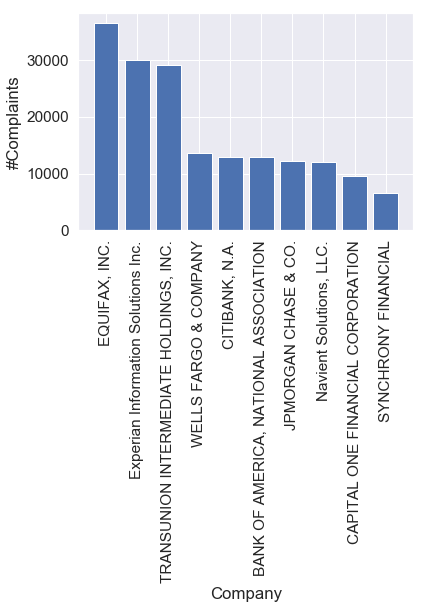

In [902]:
# lets plot the top 10 in descending order
plt.bar(company_names[:10], complaint_freq[:10])
plt.xticks(company_names[:10], rotation=90)
plt.xlabel('Company')
plt.ylabel('#Complaints')
plt.show()

From the above plot, we observe that the top 3 institutions with highest number of complaints are - Equifax, Experian Information Solutions Inc, and TransUnion. All these 3 institutions are primarily consumer credit reporting agencies. 

In [903]:
df.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')

In [904]:
df['Product'].unique()

array(['Debt collection',
       'Credit reporting, credit repair services, or other personal consumer reports',
       'Credit card or prepaid card', 'Checking or savings account',
       'Vehicle loan or lease',
       'Payday loan, title loan, or personal loan', 'Mortgage',
       'Student loan',
       'Money transfer, virtual currency, or money service',
       'Credit reporting', 'Credit card', 'Bank account or service',
       'Payday loan', 'Consumer Loan', 'Money transfers', 'Prepaid card',
       'Other financial service', 'Virtual currency'], dtype=object)

In [905]:
df['Product'].unique().shape

(18,)

#### OBSERVATION
Our next task is: to build a model using consumer complaint narrative to predict product type. From the metadata and technical documentation of the dataset, one may note that effective 24 April 2017, there are supposed to be 9 different Product options. But as we can see our dataset contains 18 different Product options. So let's clean!

In [906]:
true_product_options = ['Checking or savings account',
'Credit card or prepaid card',
'Credit reporting, credit repair services, or other personal consumer reports',
'Debt collection',
'Money transfer, virtual currency, or money service',
'Mortgage',
'Payday loan, title loan, or personal loan',
'Student loan',
'Vehicle loan or lease']

In [907]:
true_product_options

['Checking or savings account',
 'Credit card or prepaid card',
 'Credit reporting, credit repair services, or other personal consumer reports',
 'Debt collection',
 'Money transfer, virtual currency, or money service',
 'Mortgage',
 'Payday loan, title loan, or personal loan',
 'Student loan',
 'Vehicle loan or lease']

In [908]:
df[df['Product'] == 'Other financial service']['Sub-product'].unique()

array(['Debt settlement', 'Check cashing', 'Credit repair',
       'Traveler’s/Cashier’s checks', 'Foreign currency exchange',
       'Money order', 'Refund anticipation check'], dtype=object)

In [909]:
df[df['Product'] == true_product_options[4]]['Sub-product'].unique()

array(['Domestic (US) money transfer', 'International money transfer',
       'Check cashing service', 'Mobile or digital wallet',
       "Traveler's check or cashier's check", 'Virtual currency',
       'Money order', 'Refund anticipation check',
       'Foreign currency exchange', 'Debt settlement'], dtype=object)

We can see that the Product 'Other financial service' is similar to the Product 'Money transfer,..'

In [910]:
df.loc[df['Product'] == 'Credit card', 'Product'] = true_product_options[1]

In [911]:
df.loc[df['Product'] == 'Credit reporting', 'Product'] = true_product_options[2]

In [912]:
df.loc[df['Product'] == 'Bank account or service', 'Product'] = true_product_options[0]

In [913]:
df.loc[df['Product'] == 'Payday loan', 'Product'] = true_product_options[-3]

In [914]:
df.loc[df['Product'] == 'Consumer Loan', 'Product'] = true_product_options[-3]

In [915]:
df.loc[df['Product'] == 'Money transfers', 'Product'] = true_product_options[4]

In [916]:
df.loc[df['Product'] == 'Prepaid card', 'Product'] = true_product_options[1]

In [917]:
df.loc[df['Product'] == 'Virtual currency', 'Product'] = true_product_options[4]

In [918]:
df.loc[df['Product'] == 'Other financial service', 'Product'] = true_product_options[4]

In [919]:
# sanity check - success
df[df['Product'] == 'Credit card']

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID


In [920]:
df['Consumer complaint narrative'].iloc[0]

"Contacted around XXXX XX/XX/XXXX from Associated Credit Services . The person I spoke to was incredibly rude and condescending. He told me that if I did not pay my XXXX XXXX  balance in full he would sue me. He also appeared to be looking at my credit report and told me if I did not pay my balance in full today he would get an account number from my report and attempt to run it on that. He said I had a XXXX XXXX card that had {$300.00} in available credit which is not my card. I'm simply an authorized user on it. When I told him that was my father 's card he told me to use that card today or he would call my father and inform him of my bad debts. I immediately hung up the phone. He then called me back on a blocked number and said if I do not pay in full today he would contact my place of employment and inform them of my bad debt. \n\nAccount is for {$1600.00} from XXXX XXXX XXXX. I offered to pay him in {$25.00} installments since I am in XXXX  and he said I need {$350.00} minimum tod

In [921]:
#removing punctuations, extra spaces etc
import re
import string

def makeWordList(corpus_text):

    for c in string.punctuation:
        corpus_text = corpus_text.replace(c, "") 
    
    text = re.sub(r'\S*\d\S*', '', corpus_text) 
    text = re.sub(r'[^\w\s]', '', text)         
    
    text = text.lower().split()           
    
    li = []
    for token in text:
        li.append(token)

    return " ".join(li)

In [922]:
corpus = []
for i in df['Consumer complaint narrative'][:30000]:
    corpus.append(makeWordList(i))  

In [923]:
corpus[0]

'contacted around xxxx xxxxxxxx from associated credit services the person i spoke to was incredibly rude and condescending he told me that if i did not pay my xxxx xxxx balance in full he would sue me he also appeared to be looking at my credit report and told me if i did not pay my balance in full today he would get an account number from my report and attempt to run it on that he said i had a xxxx xxxx card that had in available credit which is not my card im simply an authorized user on it when i told him that was my father s card he told me to use that card today or he would call my father and inform him of my bad debts i immediately hung up the phone he then called me back on a blocked number and said if i do not pay in full today he would contact my place of employment and inform them of my bad debt account is for from xxxx xxxx xxxx i offered to pay him in installments since i am in xxxx and he said i need minimum today or we go to court'

### Lemmatizer
Reference: I have developed my lemmatizer based on the scikit-learn documentation (https://scikit-learn.org/stable/modules/feature_extraction.html), Section 4.2.3.10. Customizing the vectorizer classes - Tips and tricks


In [1]:
'''
import spacy 
nlp = spacy.load('en', disable=['ner', 'parser', 'tagger']) #disabling to optimize loading time

def word_tokenizer(doc):
    parsed_doc = nlp(doc)
    return([token.lemma_.lower() for token in parsed_doc if re.match('[a-zA-Z]+$', token.orth_) and token.lemma_ != '-PRON-'])
'''   

"\nimport spacy \nnlp = spacy.load('en', disable=['ner', 'parser', 'tagger']) #disabling to optimize loading time\n\ndef word_tokenizer(doc):\n    parsed_doc = nlp(doc)\n    return([token.lemma_.lower() for token in parsed_doc if re.match('[a-zA-Z]+$', token.orth_) and token.lemma_ != '-PRON-'])\n"

In [925]:
#Without lemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=50, stop_words="english", max_df=0.8, max_features=50)
X = vectorizer.fit_transform(corpus)
print(vectorizer.vocabulary_) # a mapping of terms to feature indices

{'contacted': 14, 'xxxx': 47, 'xxxxxxxx': 48, 'credit': 15, 'told': 46, 'did': 20, 'pay': 32, 'balance': 4, 'report': 38, 'account': 0, 'number': 30, 'said': 42, 'card': 8, 'phone': 35, 'called': 7, 'debt': 19, 'service': 44, 'reporting': 40, 'paid': 31, 'collection': 10, 'sent': 43, 'removed': 37, 'letter': 25, 'received': 36, 'date': 16, 'dispute': 21, 'address': 2, 'company': 11, 'consumer': 13, 'bureaus': 6, 'accounts': 1, 'information': 23, 'file': 22, 'days': 18, 'request': 41, 'money': 28, 'time': 45, 'check': 9, 'payments': 34, 'complaint': 12, 'mortgage': 29, 'reported': 39, 'late': 24, 'payment': 33, 'bank': 5, 'asked': 3, 'years': 49, 'day': 17, 'make': 27, 'loan': 26}


In [926]:
'''
# With lemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
#vectorizer = TfidfVectorizer(min_df=50, stop_words="english", max_df=0.8, max_features=50)
vectorizer = TfidfVectorizer(min_df=50, stop_words="english", max_df=0.8, max_features=50, tokenizer=word_tokenizer)
X = vectorizer.fit_transform(corpus)
print(vectorizer.vocabulary_) # a mapping of terms to feature indices
'''

'\n# With lemmatizer\nfrom sklearn.feature_extraction.text import TfidfVectorizer\n#vectorizer = TfidfVectorizer(min_df=50, stop_words="english", max_df=0.8, max_features=50)\nvectorizer = TfidfVectorizer(min_df=50, stop_words="english", max_df=0.8, max_features=50, tokenizer=word_tokenizer)\nX = vectorizer.fit_transform(corpus)\nprint(vectorizer.vocabulary_) # a mapping of terms to feature indices\n'

Adding the lemmatizer improved the quality of features captured and performance. If you have spacy and 'en' dictionary installed, the above two blocks of commented code may be  uncommented.  
In addition to the usual stop words, due to privacy concerns, we see 'xxxx' and 'xxxxxxxx' turning up in our list frequently. Since this doesnt contribute much to our analysis, we can add this to our stop word list.

In [927]:
#modifying the stop word list
from sklearn.feature_extraction import text
my_stop_words = text.ENGLISH_STOP_WORDS.union(['xxxx', 'xxxxxxxx'])

In [928]:
#Without lemmatizer
vectorizer = TfidfVectorizer(min_df=50, stop_words=my_stop_words, max_df=0.8, max_features=60)
X = vectorizer.fit_transform(corpus)
print(vectorizer.vocabulary_) # a mapping of terms to feature indices

{'contacted': 15, 'credit': 16, 'told': 58, 'did': 21, 'pay': 40, 'balance': 4, 'report': 48, 'account': 0, 'number': 37, 'said': 53, 'card': 8, 'phone': 43, 'called': 7, 'contact': 14, 'debt': 20, 'service': 55, 'reporting': 50, 'paid': 39, 'collection': 10, 'sent': 54, 'removed': 47, 'letter': 29, 'received': 45, 'date': 17, 'requested': 52, 'dispute': 22, 'original': 38, 'address': 2, 'company': 11, 'consumer': 13, 'bureaus': 6, 'remove': 46, 'accounts': 1, 'information': 26, 'file': 23, 'days': 19, 'request': 51, 'money': 32, 'time': 56, 'provide': 44, 'check': 9, 'payments': 42, 'complaint': 12, 'months': 34, 'home': 25, 'mortgage': 35, 'times': 57, 'reported': 49, 'late': 28, 'month': 33, 'payment': 41, 'bank': 5, 'asked': 3, 'years': 59, 'day': 18, 'help': 24, 'make': 31, 'loan': 30, 'new': 36, 'just': 27}


In [929]:
# With lemmatizer
#vectorizer = TfidfVectorizer(min_df=50, stop_words=my_stop_words, max_df=0.8, max_features=50, tokenizer=word_tokenizer)
#X = vectorizer.fit_transform(corpus)
#print(vectorizer.vocabulary_) # a mapping of terms to feature indices

In [930]:
X = X.toarray()

In [931]:
X[0]

array([0.14345533, 0.        , 0.        , 0.        , 0.24822593,
       0.        , 0.        , 0.10016362, 0.45899828, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.12875716,
       0.11921474, 0.18525474, 0.        , 0.        , 0.        ,
       0.10967056, 0.18795729, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.22798706, 0.        , 0.        ,
       0.45220722, 0.        , 0.        , 0.11630491, 0.        ,
       0.        , 0.        , 0.        , 0.15829239, 0.        ,
       0.        , 0.        , 0.        , 0.34977067, 0.        ,
       0.        , 0.        , 0.        , 0.40894318, 0.        ])

We have obtained the tf-idf matrix for the narrative of all complaints in the dataset. 

In [932]:
# In order to understand each of the feature names from the feature set
vectorizer.get_feature_names()

['account',
 'accounts',
 'address',
 'asked',
 'balance',
 'bank',
 'bureaus',
 'called',
 'card',
 'check',
 'collection',
 'company',
 'complaint',
 'consumer',
 'contact',
 'contacted',
 'credit',
 'date',
 'day',
 'days',
 'debt',
 'did',
 'dispute',
 'file',
 'help',
 'home',
 'information',
 'just',
 'late',
 'letter',
 'loan',
 'make',
 'money',
 'month',
 'months',
 'mortgage',
 'new',
 'number',
 'original',
 'paid',
 'pay',
 'payment',
 'payments',
 'phone',
 'provide',
 'received',
 'remove',
 'removed',
 'report',
 'reported',
 'reporting',
 'request',
 'requested',
 'said',
 'sent',
 'service',
 'time',
 'times',
 'told',
 'years']

In [933]:
# Constructing our feature set
feature_set = pd.DataFrame(X)

In [934]:
feature_set.columns = vectorizer.get_feature_names()

In [935]:
feature_set.head()

,account,accounts,address,asked,balance,bank,bureaus,called,card,check,...,reporting,request,requested,said,sent,service,time,times,told,years
0,0.143455,0.000000,0.000000,0.0,0.248226,0.0,0.000000,0.100164,0.458998,0.000000,...,0.000000,0.000000,0.000000,0.349771,0.000000,0.0000,0.000000,0.0,0.408943,0.0
1,0.135383,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.195747,0.000000,0.000000,0.000000,0.190025,0.5007,0.000000,0.0,0.000000,0.0
2,0.176957,0.000000,0.164574,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.159362,0.000000,0.000000,0.0000,0.000000,0.0,0.000000,0.0
3,0.266622,0.210352,0.000000,0.0,0.000000,0.0,0.239392,0.000000,0.000000,0.000000,...,0.192752,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.0,0.190013,0.0
4,0.000000,0.000000,0.021823,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.046985,...,0.220528,0.061659,0.063395,0.000000,0.000000,0.0000,0.016231,0.0,0.000000,0.0


In [936]:
target = df['Product'][:30000].values #working on a subset of the data to avoid memory issues

In [937]:
target

array(['Debt collection', 'Debt collection',
       'Credit reporting, credit repair services, or other personal consumer reports',
       ..., 'Mortgage', 'Credit card or prepaid card',
       'Checking or savings account'], dtype=object)

In [938]:
feature_set.head()

,account,accounts,address,asked,balance,bank,bureaus,called,card,check,...,reporting,request,requested,said,sent,service,time,times,told,years
0,0.143455,0.000000,0.000000,0.0,0.248226,0.0,0.000000,0.100164,0.458998,0.000000,...,0.000000,0.000000,0.000000,0.349771,0.000000,0.0000,0.000000,0.0,0.408943,0.0
1,0.135383,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.195747,0.000000,0.000000,0.000000,0.190025,0.5007,0.000000,0.0,0.000000,0.0
2,0.176957,0.000000,0.164574,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.159362,0.000000,0.000000,0.0000,0.000000,0.0,0.000000,0.0
3,0.266622,0.210352,0.000000,0.0,0.000000,0.0,0.239392,0.000000,0.000000,0.000000,...,0.192752,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.0,0.190013,0.0
4,0.000000,0.000000,0.021823,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.046985,...,0.220528,0.061659,0.063395,0.000000,0.000000,0.0000,0.016231,0.0,0.000000,0.0


### Model Building  
For the given learning task, I have used 4 different classification techniques - Naive Bayes, Multinomial Naive Bayes, Logistic Regression and Linear Support Vector Classifier. Their accuracy is calculated and the corresponding confusion matrix has been displayed. I found that Logistic Regression and Linear SVC provided >70% accuracy for a sample of the data set.

#### Classifier For Product class

In [939]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature_set, target, test_size = 0.3, random_state = 0)

#### Gaussian Naive Bayes

In [940]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
gnb = GaussianNB()
model = gnb.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [941]:
accuracy_score(y_test, y_pred)

0.5704444444444444

#### Logistic Regression

In [942]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

#logreg.fit(feature_set, target)
logreg.fit(X_train, y_train)

C:\Users\Shiven\Anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Shiven\Anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [943]:
#y_pred_logreg = logreg.predict(feature_set)
y_pred_logreg = logreg.predict(X_test)

In [944]:
from sklearn.metrics import confusion_matrix

#cnf_matrix = confusion_matrix(target, y_pred_logreg)
cnf_matrix = confusion_matrix(y_test, y_pred_logreg, labels=true_product_options)

print(cnf_matrix)

[[ 430   83   59   26   13    9    2    0    0]
 [  54  527  246   46    3    5    2    2    1]
 [  54  122 3606  229    2   63    2   11    4]
 [  28   52  539 1073    4   35    4   17    2]
 [  79   17   25   20   27    3    0    0    0]
 [  15   12   71   25    2  520   12   38    2]
 [   6   10   54   52    1   10   29   46    6]
 [   9    7   62   42    1   14    8  177    2]
 [  10   15   88   47    0   11    8   50   12]]


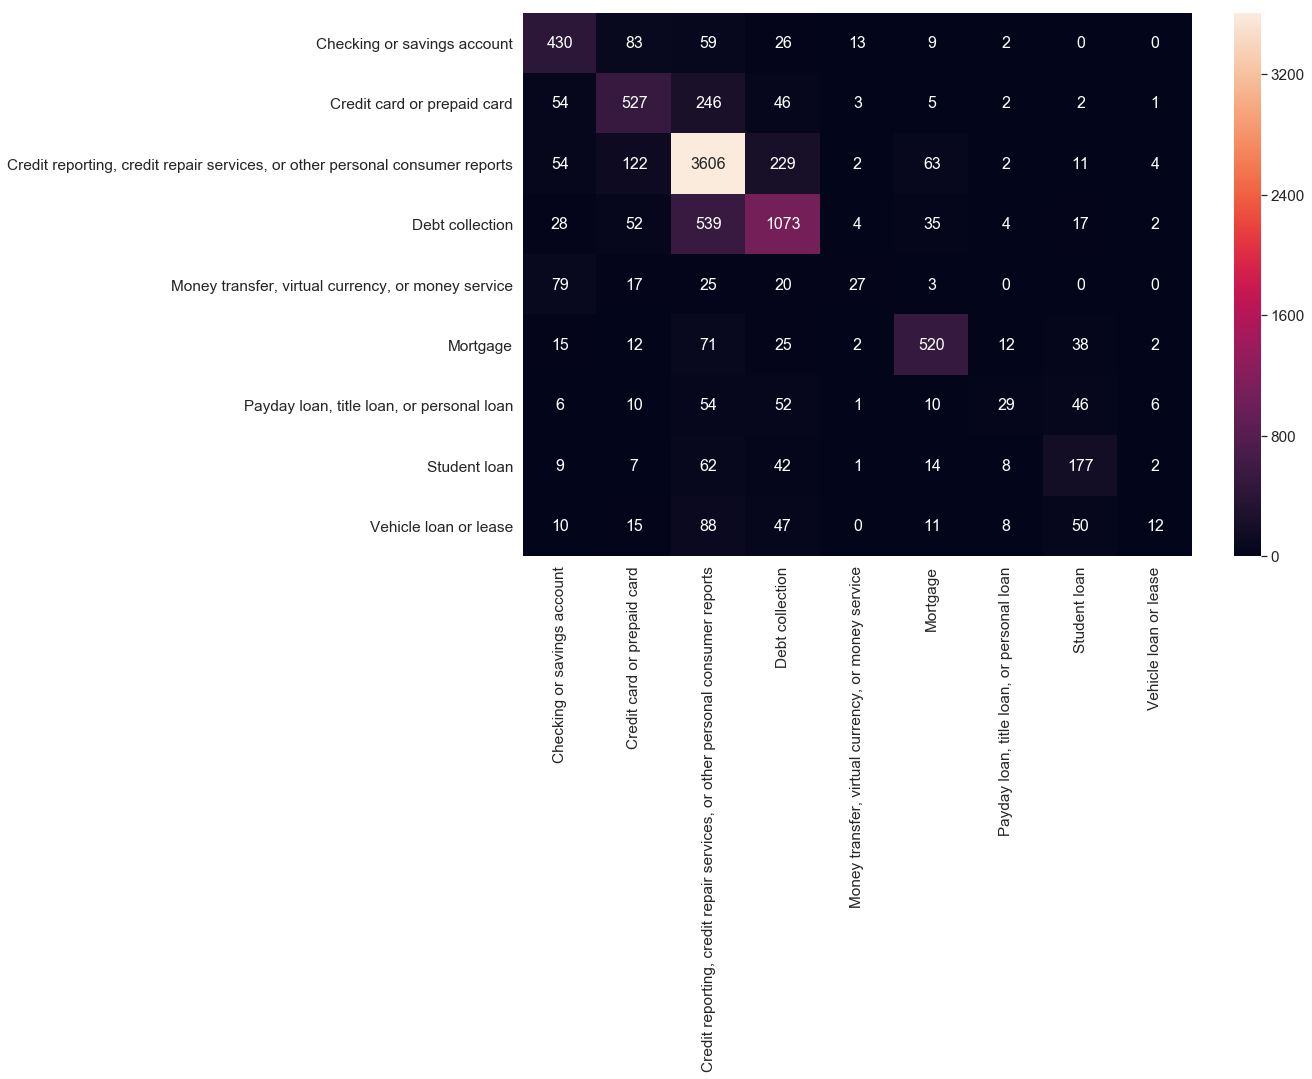

In [945]:
df_cm = pd.DataFrame(cnf_matrix, true_product_options,
                  true_product_options)
plt.figure(figsize = (15,10))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')# font size

In [946]:
#logreg.score(feature_set, target)
logreg.score(X_test, y_test)

0.7112222222222222

#### Multinomial Naive Bayes

In [947]:
from sklearn.naive_bayes import MultinomialNB


In [948]:
modelMNB = MultinomialNB() 

In [949]:
#modelMNB.fit(feature_set, target)
modelMNB.fit(X_train, y_train)
y_pred_mnb = modelMNB.predict(X_test)

In [950]:
modelMNB.score(X_test, y_test)

0.6645555555555556

In [951]:
#cnf_matrix = confusion_matrix(target, y_pred_logreg)
cnf_matrix_mnb = confusion_matrix(y_test, y_pred_mnb, labels=true_product_options)

print(cnf_matrix)

[[ 430   83   59   26   13    9    2    0    0]
 [  54  527  246   46    3    5    2    2    1]
 [  54  122 3606  229    2   63    2   11    4]
 [  28   52  539 1073    4   35    4   17    2]
 [  79   17   25   20   27    3    0    0    0]
 [  15   12   71   25    2  520   12   38    2]
 [   6   10   54   52    1   10   29   46    6]
 [   9    7   62   42    1   14    8  177    2]
 [  10   15   88   47    0   11    8   50   12]]


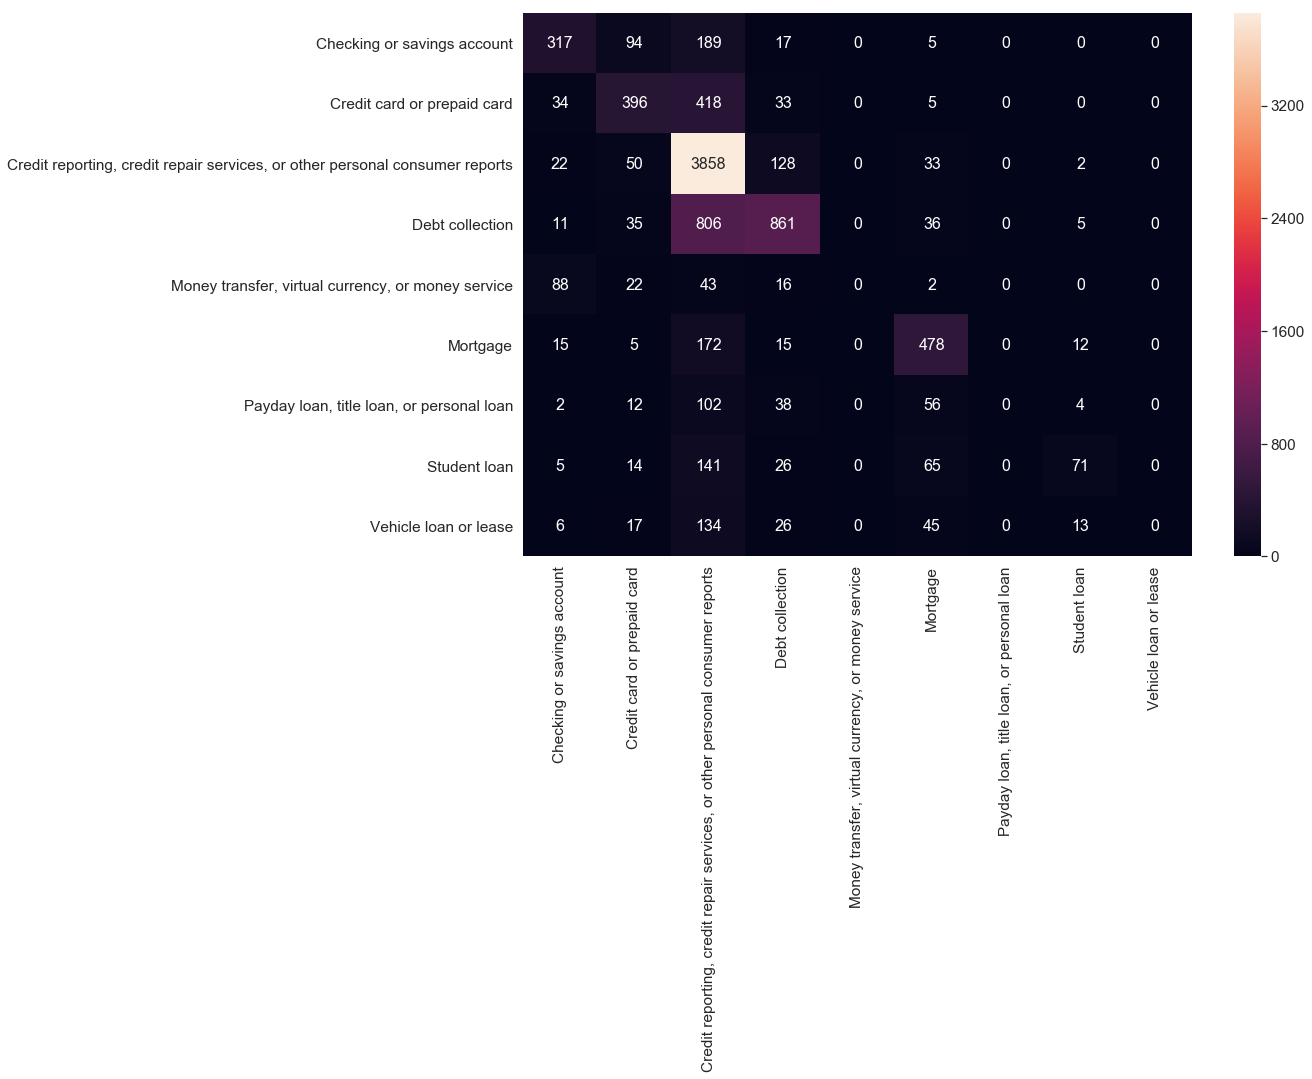

In [952]:
df_cm = pd.DataFrame(cnf_matrix_mnb, true_product_options,
                  true_product_options)
plt.figure(figsize = (15,10))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')# font size

#### Support Vector Classifier

In [953]:
from sklearn.svm import LinearSVC
clf = LinearSVC()
clf.fit(X_train, y_train)
y_pred_svc = clf.predict(X_test)

In [954]:
clf.score(X_test, y_test)

0.707

In [955]:
cnf_matrix_svm = confusion_matrix(y_test, y_pred_svc, labels=true_product_options)

print(cnf_matrix_svm)

[[ 447   82   54   25    7    7    0    0    0]
 [  65  523  242   42    2    6    2    4    0]
 [  58  119 3598  226    2   71    1   17    1]
 [  30   48  546 1063    7   36    2   21    1]
 [  96   12   26   18   16    3    0    0    0]
 [  16    9   68   22    2  525    1   54    0]
 [   8    9   50   57    1   15    8   64    2]
 [  10    8   61   40    2   19    0  182    0]
 [  11   16   90   45    1   18    4   55    1]]


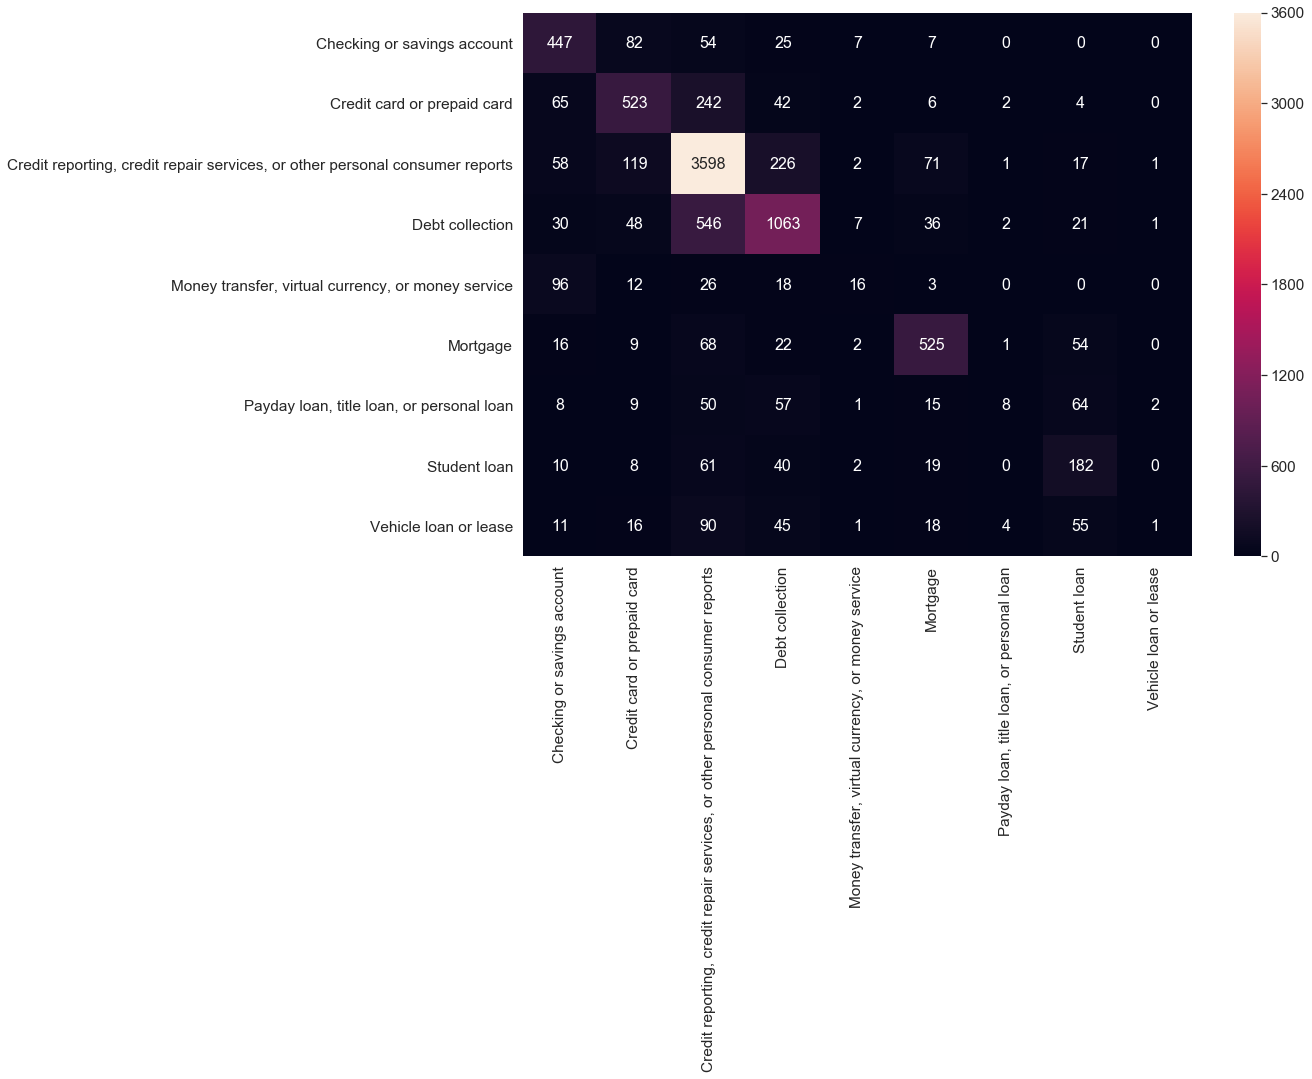

In [956]:
df_cm = pd.DataFrame(cnf_matrix_svm, true_product_options,
                  true_product_options)
plt.figure(figsize = (15,10))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')# font size

### For subproduct

In [957]:
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
803,02/06/2019,Debt collection,Other debt,Communication tactics,"Used obscene, profane, or other abusive language",Contacted around XXXX XX/XX/XXXX from Associat...,Company believes it acted appropriately as aut...,"Associated Credit Services, Inc.",GA,300XX,Servicemember,Consent provided,Web,02/06/2019,Closed with explanation,Yes,NaN,3144317
963,02/05/2019,Debt collection,Other debt,Written notification about debt,Didn't receive notice of right to dispute,Associate credit service is reporting a paid c...,Company believes it acted appropriately as aut...,"Associated Credit Services, Inc.",NY,117XX,NaN,Consent provided,Web,02/05/2019,Closed with explanation,Yes,NaN,3142951
1160,02/05/2019,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,XXXX XXXX XXXX has placed an inaccurate entry ...,Company believes the complaint is the result o...,"CCS Financial Services, Inc.",TX,NaN,NaN,Consent provided,Web,02/05/2019,Closed with explanation,Yes,NaN,3142990
1270,02/04/2019,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX X...,Company has responded to the consumer and the ...,"HCFS Health Care Financial Services, Inc.",WI,531XX,Servicemember,Consent provided,Web,02/04/2019,Closed with explanation,Yes,NaN,3141959
1299,02/04/2019,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,(a)BlockExcept as otherwise provided in this s...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",FL,338XX,NaN,Consent provided,Web,02/04/2019,Closed with explanation,Yes,NaN,3142271


In [958]:
target_2 = df['Sub-product'][:30000].values

In [959]:
true_subproduct_options = df['Sub-product'].unique()

In [960]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature_set, target_2, test_size = 0.3, random_state = 0)

In [961]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

#logreg.fit(feature_set, target)
logreg.fit(X_train, y_train)

C:\Users\Shiven\Anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Shiven\Anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [962]:
#y_pred_logreg = logreg.predict(feature_set)
y_pred_logreg = logreg.predict(X_test)

In [963]:
from sklearn.metrics import confusion_matrix

#cnf_matrix = confusion_matrix(target, y_pred_logreg)
cnf_matrix = confusion_matrix(y_test, y_pred_logreg, labels=true_subproduct_options)

print(cnf_matrix)

[[ 139  269   12 ...    0    0    0]
 [  65 3741    4 ...    0    0    0]
 [  87  163    9 ...    0    0    0]
 ...
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]]


In [964]:
logreg.score(X_test, y_test)

0.5803333333333334

### For Issue:

In [965]:
target_3 = df['Issue'][:30000].values

In [966]:
issue_options = df['Issue'].unique()

In [967]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature_set, target_3, test_size = 0.3, random_state = 0)

In [968]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

#logreg.fit(feature_set, target)
logreg.fit(X_train, y_train)

C:\Users\Shiven\Anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Shiven\Anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [969]:
#y_pred_logreg = logreg.predict(feature_set)
y_pred_logreg = logreg.predict(X_test)

In [970]:
from sklearn.metrics import confusion_matrix

#cnf_matrix = confusion_matrix(target, y_pred_logreg)
cnf_matrix = confusion_matrix(y_test, y_pred_logreg, labels=issue_options)

print(cnf_matrix)

[[125   5   3 ...   0   0   0]
 [  2  11  37 ...   0   0   0]
 [  2   5 266 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]


In [971]:
logreg.score(X_test, y_test)

0.4261111111111111

### For sub-issue

In [972]:
target_4 = df['Sub-issue'][:30000].values

In [973]:
sub_issue_options = df['Sub-issue'].unique()

In [974]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature_set, target_3, test_size = 0.3, random_state = 0)

In [975]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

#logreg.fit(feature_set, target)
logreg.fit(X_train, y_train)

C:\Users\Shiven\Anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Shiven\Anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [976]:
#y_pred_logreg = logreg.predict(feature_set)
y_pred_logreg = logreg.predict(X_test)

In [977]:
from sklearn.metrics import confusion_matrix

#cnf_matrix = confusion_matrix(target, y_pred_logreg)
cnf_matrix = confusion_matrix(y_test, y_pred_logreg, labels=sub_issue_options)

print(cnf_matrix)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [978]:
logreg.score(X_test, y_test)

0.4261111111111111